In [232]:
import matplotlib.pyplot as plt
import numpy as np

In [233]:
eff = lambda n : 0.9801932153425763 + -0.03638144889683877 * np.log2(n)

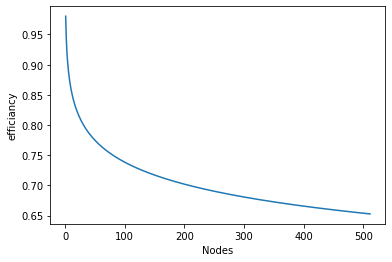

In [234]:
x = np.arange(1, 512, 1)


plt.plot(x, [eff(s) for s in x])
plt.xlabel("Nodes")
plt.ylabel("efficiancy")
# plt.xticks(x)
plt.show()

In [235]:
w1 = {"p": 0.014, "power": 100, "wpn": 1, "cpu": "genoa"}
w2 = {"p": 0.029, "power": 100, "wpn": 2, "cpu": "genoa"}

works = [{"p": 0.014, "power": 100, "wpn": 1, "cpu": "genoa"}, 
         {"p": 0.029, "power": 100, "wpn": 2, "cpu": "genoa"}, 
         {"p": 389 / 20000, "power": 100, "wpn": 1, "cpu": "Bergamo"},
         {"p": 367 / 10000, "power": 100, "wpn": 2, "cpu": "Bergamo"},
         {"p": 1315 / 20000, "power": 100, "wpn": 1, "cpu": "Ampere"},
         {"p": 1179 / 10000, "power": 100, "wpn": 2, "cpu": "Ampere"},
         {"p": 504 / 20000, "power": 100, "wpn": 1, "cpu": "SPR DDR"},
         {"p": 526 / 10000, "power": 100, "wpn": 2, "cpu": "SPR DDR"},
         {"p": 365 / 20000, "power": 100, "wpn": 1, "cpu": "SPR HBM"},
         {"p": 364 / 10000, "power": 100, "wpn": 2, "cpu": "SPR HBM"},]

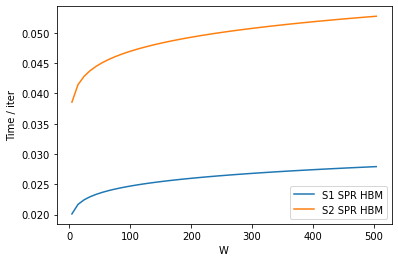

In [236]:
# x = np.array([2, 4, 8, 16, 32, 64, 128])
x = np.arange(4, 512, 10)

cpus = ['SPR HBM']

for w in works:
    if not w['cpu'] in cpus:
        continue
        
    plt.plot(x, [w["p"] / eff(s / w['wpn']) for s in x], label=f"S{w['wpn']} {w['cpu']}")
plt.xlabel("W")
plt.ylabel("Time / iter")
plt.legend()
plt.show()

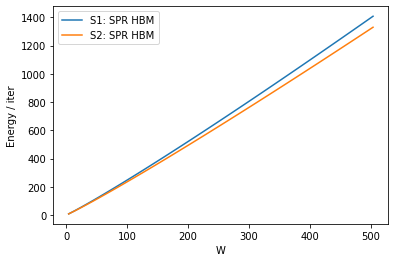

In [237]:
# print(np.array([ (w1['power'] * w1['p'] * (s / w1['wpn'])) / eff(s / w1['wpn']) for s in x]) /  np.array([ (w3['power'] * w3['p'] * (s / w3['wpn'])) / eff(s / w3['wpn']) for s in x]))
for w in works:
    if not w['cpu'] in cpus:
        continue
    plt.plot(x, [ (w['power'] * w['p'] * (s / w['wpn'])) / eff(s / w['wpn']) for s in x], label=f"S{w['wpn']}: {w['cpu']}")
plt.xlabel("W")
plt.ylabel("Energy / iter")
plt.legend()
plt.show()

0
{'p': 0.014, 'power': 100, 'wpn': 1, 'cpu': 'genoa'}
2
{'p': 0.01945, 'power': 100, 'wpn': 1, 'cpu': 'Bergamo'}
4
{'p': 0.06575, 'power': 100, 'wpn': 1, 'cpu': 'Ampere'}
6
{'p': 0.0252, 'power': 100, 'wpn': 1, 'cpu': 'SPR DDR'}
8
{'p': 0.01825, 'power': 100, 'wpn': 1, 'cpu': 'SPR HBM'}


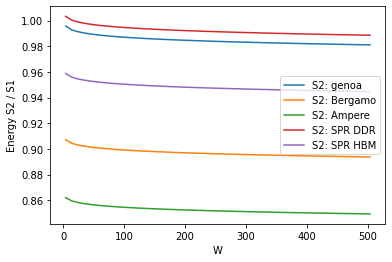

In [254]:
# print(np.array([ (w1['power'] * w1['p'] * (s / w1['wpn'])) / eff(s / w1['wpn']) for s in x]) /  np.array([ (w3['power'] * w3['p'] * (s / w3['wpn'])) / eff(s / w3['wpn']) for s in x]))
prev = {}
for i, w in enumerate(works):
    if not i % 2 == 1:
        print(i)
        print(w)

        continue
    prev = works[i - 1]
    ef = np.array([ (w['power'] * w['p'] * (s / w['wpn'])) / eff(s / w['wpn']) for s in x])
    ef = ef / np.array([ (prev['power'] * prev['p'] * (s / prev['wpn'])) / eff(s / prev['wpn']) for s in x])
    plt.plot(x, ef, label=f"S{w['wpn']}: {w['cpu']}")
plt.xlabel("W")
plt.ylabel("Energy S2 / S1")
plt.legend()
plt.show()